In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv("auto_mpg_dataset.csv")

In [3]:
#checking the head of the data
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [4]:
#checking the info and if there is any null values
df.info()
#the mpg is the dependent variable "mile per galayon" that represents the speed of the car

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


- The data should consist of 398 instances with 9 attributes
- 3 integer , 5 float , 1 object 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,-1404.643216,12213.424763,-100000.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


- cheking the mean, std, min, max and the three quartile range

In [6]:
#analyzing the features
df["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

- Its clear that the most common number of cylinders is 4 
- This shows that the data isnt fake and show certinity

C:\Users\shoum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

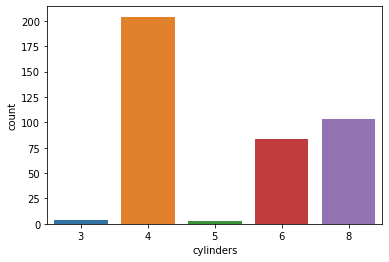

In [7]:
sns.countplot(df["cylinders"])

<AxesSubplot:>

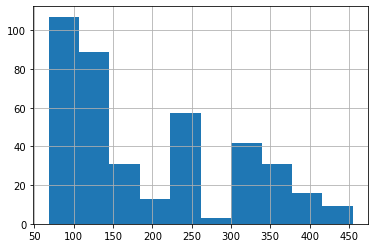

In [8]:
df["displacement"].hist()

- This Histogram shows that the data is highly left skewed

C:\Users\shoum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


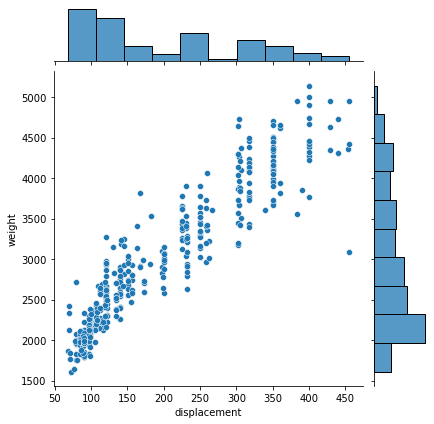

In [9]:
sns.jointplot('displacement','weight',data=df,kind='scatter')

- show the relation between the weight and displacment and its directly relation

In [10]:
df["horsepower"].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
230.0     1
133.0     1
138.0     1
193.0     1
107.0     1
Name: horsepower, Length: 94, dtype: int64

<AxesSubplot:>

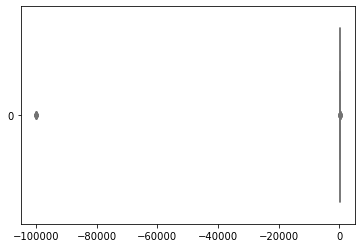

In [11]:
sns.boxplot(data=df.horsepower,palette='rainbow',orient='h')

- -100000 must be replaced
- its clear that there is an outlier

In [12]:
#delete function to replace the -100000 with null values
def delete(x):
    if x == -100000:
        x=np.nan
    return x

In [13]:
#replacing -100000 with null values in the horsepower column
df["horsepower"]=df["horsepower"].apply(lambda x: delete(x))

<AxesSubplot:>

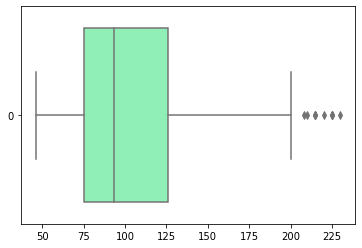

In [14]:
sns.boxplot(data=df.horsepower,palette='rainbow',orient='h')

- showing the data after removing the outlier

<AxesSubplot:>

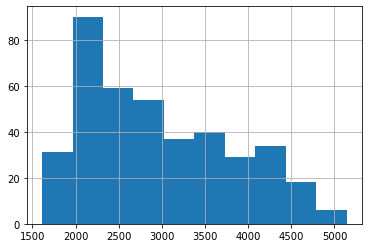

In [15]:
df["weight"].hist()

<AxesSubplot:>

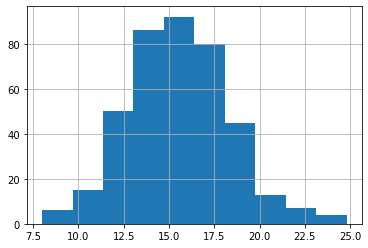

In [16]:
df["acceleration"].hist()

- normaly distributed

<AxesSubplot:>

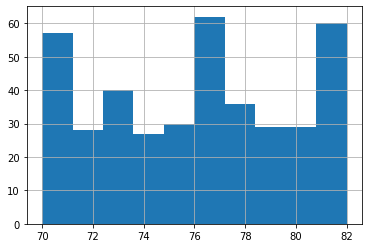

In [17]:
df["model_year"].hist()

- uniformaly distributed

<AxesSubplot:>

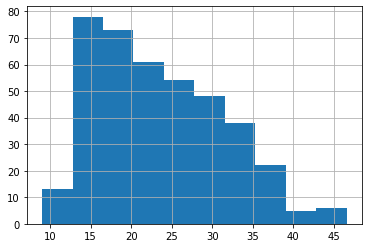

In [19]:
df["mpg"].hist()

In [20]:
#dropping the null values
df.dropna(inplace=True)

In [21]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   car_name      392 non-null    object 
 8   mpg           392 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


- The data should consist of 392 instances with 9 attributes
- 3 integer , 5 float , 1 object 

In [23]:
#check the correlation of the data
df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.423329
model_year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.580541
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.565209
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000


<AxesSubplot:>

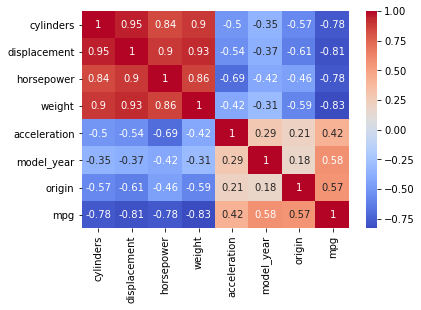

In [24]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

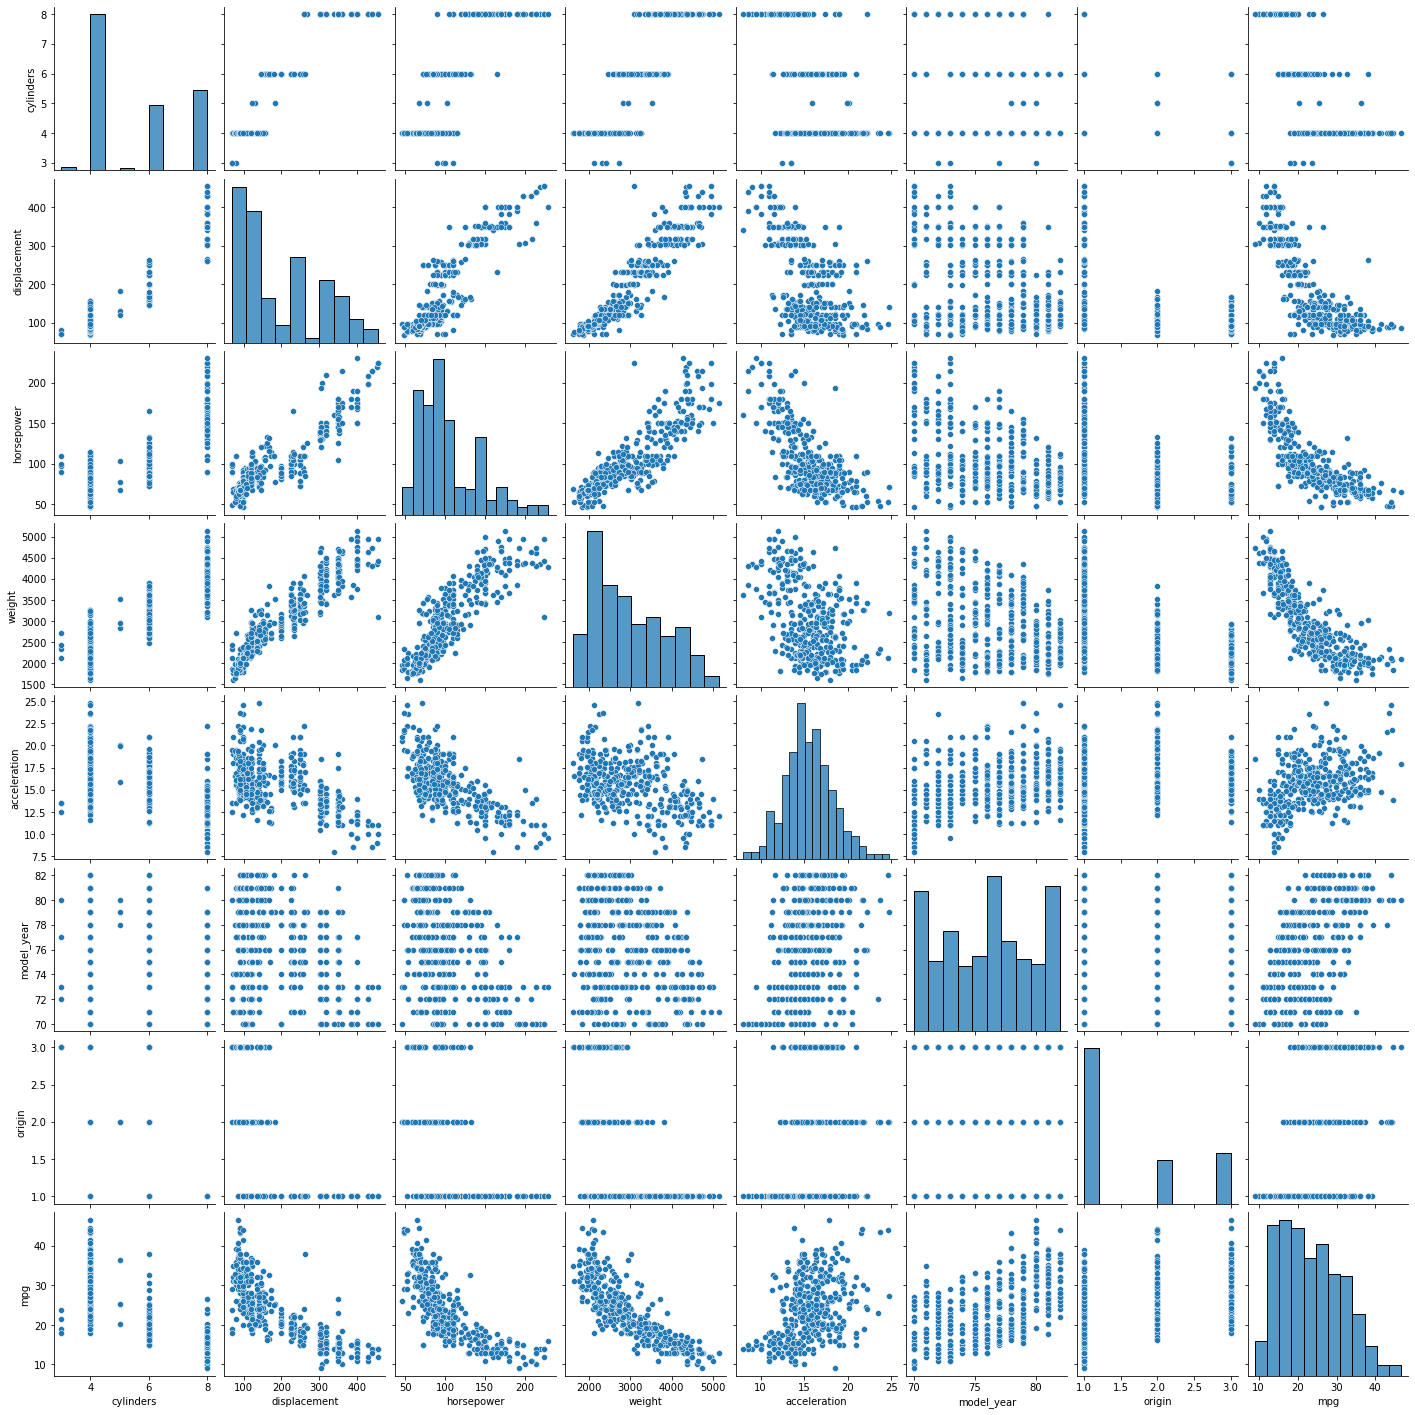

In [26]:
sns.pairplot(df)
# overveiw to the data to decide the model we will use

In [27]:
#grouping the features into feature vector "independent vector"
x=df[["cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]].values
x

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [28]:
#the independent vector
y=df["mpg"].values

In [29]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
#fitting the data into linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
#predicting the outputs of x_test
y_pred=lr.predict(x_test)

In [33]:
#checking the r2score of the lr model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8363664681024058